In [189]:

import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statsmodels.formula.api as sm
import statsmodels.api as sm
import pandoc
!pip install pandoc

The following code loads the US clean data set into python. The pandas library is used for the manipulation of the data entries. Numpy is used to perform simply mathematical operations on the data set, such as performing a log transformation. Matplotlib is used to plot the results and the statsmodels module is used to plot the data and linear regressions.

In [96]:
print("Original Data Set Columns:\n")
DF = pd.read_excel('USDF.xlsx',header=0)
print(DF.columns)

# Remove unecessary columns from the data set

null_columns = DF.columns[DF.isnull().all()] # Targets the empty columns
DF = DF.drop(empty_columns, axis=1) # Drops empty columns from data set

DF = DF.drop(columns=["PERIOD.1","PERIOD.2"]) # Targets the repeated date columns and drops them

print("\n\nClean Data Set Columns\n")
print(DF.columns,"\n\n")
print(DF.head())

Original Data Set Columns:

Index(['PERIOD', 'US_CA_USD', 'US_CA_%GDP', 'US_GDP', 'US_U', 'US_PD', 'US_MS',
       'US_R', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'PERIOD.1',
       'CD_CA_USD', 'CD_CA_%GDP', 'CD_GDP_USD', 'CD_U', 'CD_PD', 'CD_MS',
       'USD_CAD', 'CD_R', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'PERIOD.2', 'UK_CA_USD', 'UK_CA_%GDP', 'UK_GDP_USD', 'UK_U', 'UK_PD',
       'UK_MS', 'USD_UK', 'UK_R'],
      dtype='object')


Clean Data Set Columns

Index(['PERIOD', 'US_CA_USD', 'US_CA_%GDP', 'US_GDP', 'US_U', 'US_PD', 'US_MS',
       'US_R', 'CD_CA_USD', 'CD_CA_%GDP', 'CD_GDP_USD', 'CD_U', 'CD_PD',
       'CD_MS', 'USD_CAD', 'CD_R', 'UK_CA_USD', 'UK_CA_%GDP', 'UK_GDP_USD',
       'UK_U', 'UK_PD', 'UK_MS', 'USD_UK', 'UK_R'],
      dtype='object') 


      PERIOD  US_CA_USD  US_CA_%GDP     US_GDP      US_U     US_PD   US_MS  \
0 1990-01-01    -90.039   -1.610571  10047.386  5.400966  3051.958  3166.8   
1 1990-04-01    -72.861   -1.310329  10083.855  5.45098

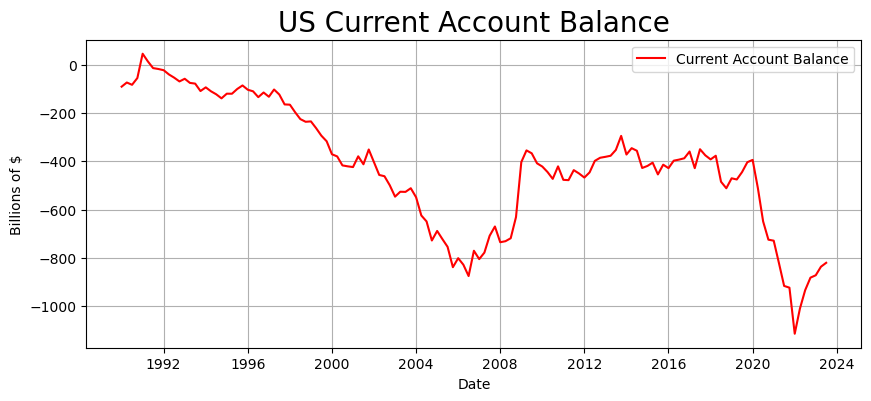

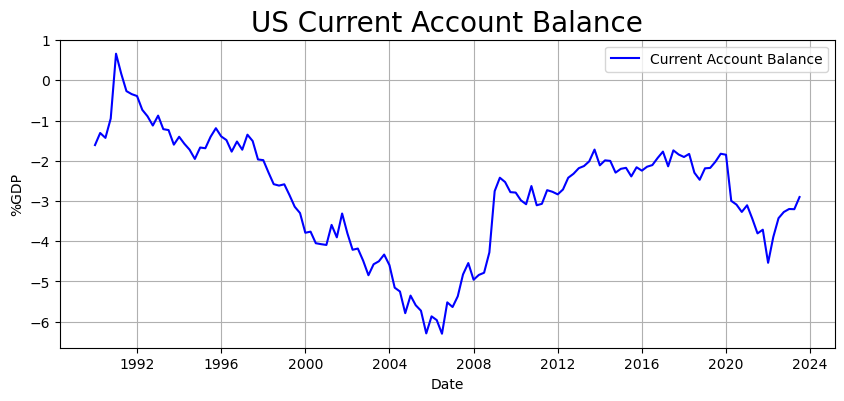

In [42]:
plt.figure(figsize=(10,4))
plt.plot(DF['PERIOD'], DF['US_CA_USD'], label='Current Account Balance', color='red')
plt.ylabel('Billions of $')
plt.xlabel('Date')
plt.grid(True)
plt.title('US Current Account Balance', fontsize=20)
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(DF['PERIOD'], DF['US_CA_%GDP'], label='Current Account Balance', color='blue')
plt.ylabel('%GDP')
plt.xlabel('Date')
plt.grid(True)
plt.title('US Current Account Balance', fontsize=20)
plt.legend()
plt.show()

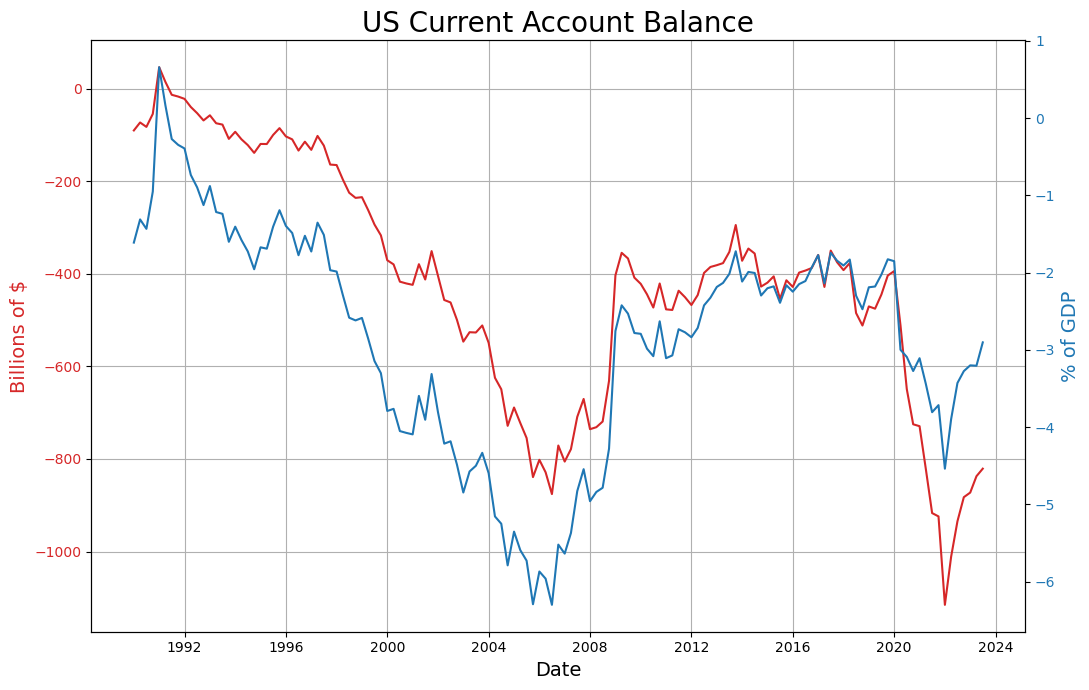

In [94]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,7))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Billions of $', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['US_CA_USD'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% of GDP', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['US_CA_%GDP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



Run OLS regression

In [61]:
# defining the variables
x = DF['US_CA_%GDP'].tolist()
y = DF['CD_CA_%GDP'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     172.7
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           8.44e-26
Time:                        17:25:45   Log-Likelihood:                -238.69
No. Observations:                 135   AIC:                             481.4
Df Residuals:                     133   BIC:                             487.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3665      0.271    -16.131      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs Canada Current Account Balance')

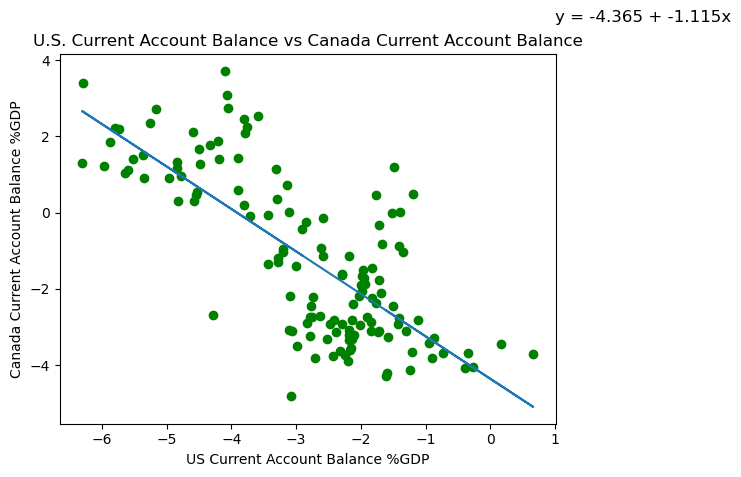

In [98]:
#find line of best fit

a = -1.1149
b = -4.3655


#add points to plot
plt.scatter(DF['US_CA_%GDP'], DF['CD_CA_%GDP'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_%GDP'], a*DF['US_CA_%GDP']+b)

#add fitted regression equation to plot
plt.text(1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('US Current Account Balance %GDP')
plt.ylabel('Canada Current Account Balance %GDP')
plt.title('U.S. Current Account Balance vs Canada Current Account Balance')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     9.225
Date:                Mon, 19 Feb 2024   Prob (F-statistic):            0.00287
Time:                        23:36:16   Log-Likelihood:                -448.14
No. Observations:                 135   AIC:                             900.3
Df Residuals:                     133   BIC:                             906.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0474      1.106     -6.371      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs Canada Current Account Balance')

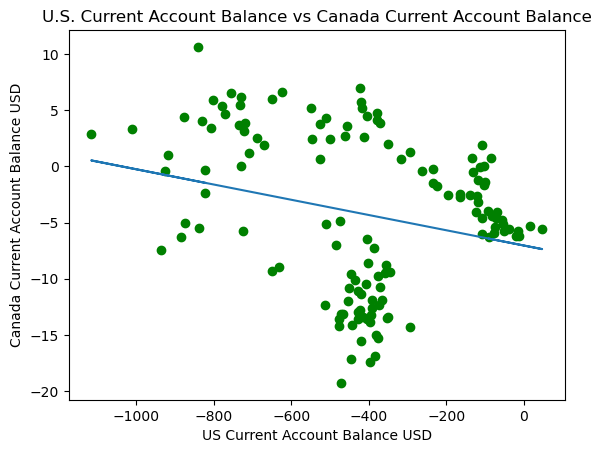

In [154]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['CD_CA_USD'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = -0.0068
b = -7.0474


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['CD_CA_USD'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('Canada Current Account Balance USD')
plt.title('U.S. Current Account Balance vs Canada Current Account Balance')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     162.8
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.53e-25
Time:                        16:56:34   Log-Likelihood:                -936.62
No. Observations:                 135   AIC:                             1877.
Df Residuals:                     133   BIC:                             1883.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1286.4348     41.236     31.197      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs Canada GDP')

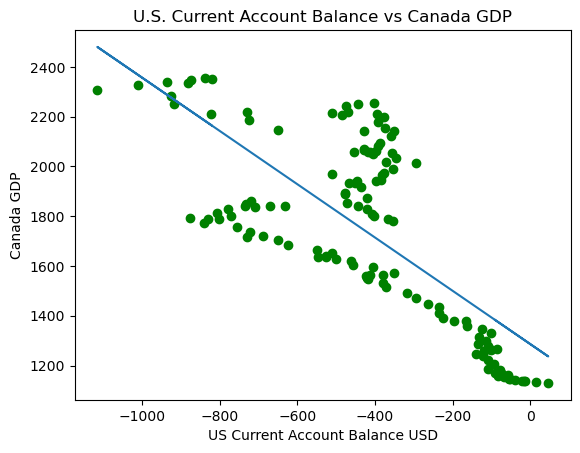

In [161]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = (DF['CD_GDP_USD']/1000).tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = -1.0705
b =  1286.4348


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['CD_GDP_USD']/1000, color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)

#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('Canada GDP')
plt.title('U.S. Current Account Balance vs Canada GDP')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.36e-21
Time:                        22:03:54   Log-Likelihood:                -214.04
No. Observations:                 135   AIC:                             432.1
Df Residuals:                     133   BIC:                             437.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7377      0.195     49.853      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs Unemployment Rate')

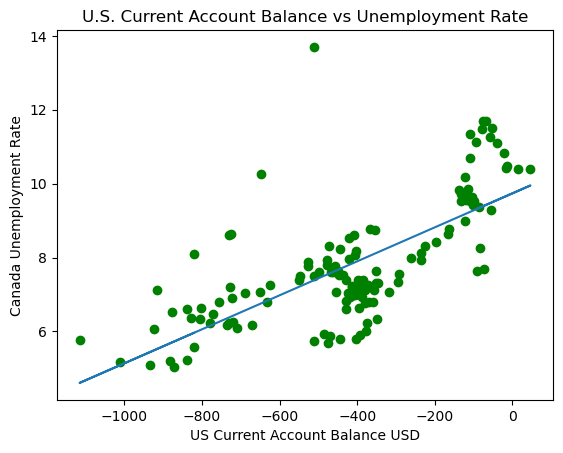

In [109]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['CD_U'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = 0.0046
b = 9.7377


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['CD_U'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('Canada Unemployment Rate')
plt.title('U.S. Current Account Balance vs Canada Unemployment Rate')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     84.53
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           6.77e-16
Time:                        22:07:19   Log-Likelihood:                -1052.1
No. Observations:                 135   AIC:                             2108.
Df Residuals:                     133   BIC:                             2114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        922.2616     97.023      9.506      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs Canada Public Debt')

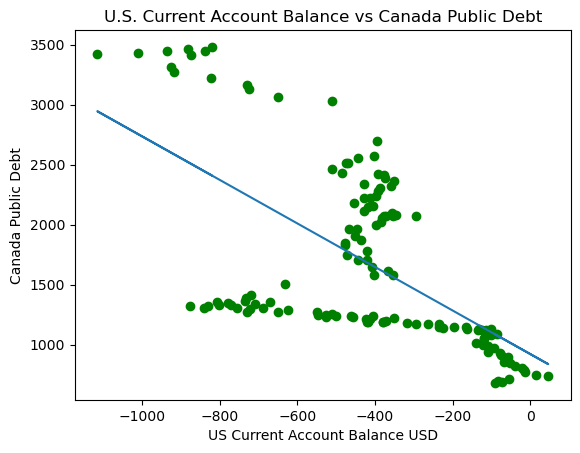

In [112]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['CD_PD'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = -1.8146
b = 922.2616


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['CD_PD'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('Canada Public Debt')
plt.title('U.S. Current Account Balance vs Canada Public Debt')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     93.06
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           5.10e-17
Time:                        22:09:50   Log-Likelihood:                -940.01
No. Observations:                 135   AIC:                             1884.
Df Residuals:                     133   BIC:                             1890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.3577     42.286      2.090      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs Canada Money Supply')

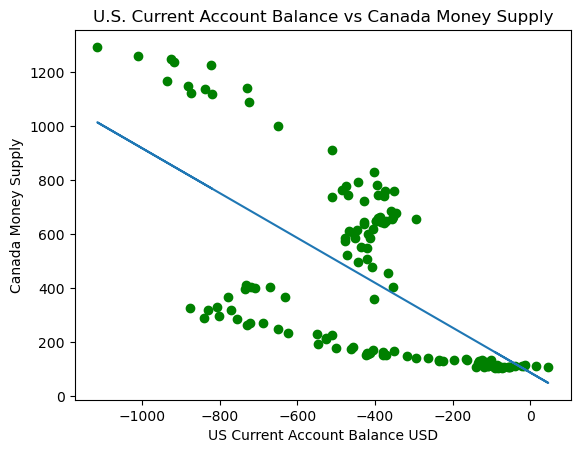

In [114]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['CD_MS'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = -0.8298
b = 88.3577


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['CD_MS'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('Canada Money Supply')
plt.title('U.S. Current Account Balance vs Canada Money Supply')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.793
Date:                Mon, 19 Feb 2024   Prob (F-statistic):             0.0536
Time:                        22:12:21   Log-Likelihood:                 114.16
No. Observations:                 135   AIC:                            -224.3
Df Residuals:                     133   BIC:                            -218.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7730      0.017     45.005      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs USD/CAD Exchange rate')

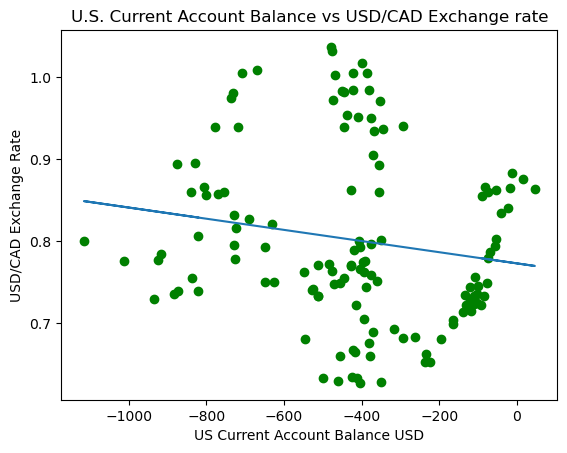

In [116]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['USD_CAD'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = -6.805e-05
b = 0.7730


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['USD_CAD'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('USD/CAD Exchange Rate')
plt.title('U.S. Current Account Balance vs USD/CAD Exchange rate')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     39.60
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           4.18e-09
Time:                        22:13:28   Log-Likelihood:                -310.56
No. Observations:                 135   AIC:                             625.1
Df Residuals:                     133   BIC:                             630.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6455      0.399     14.140      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs Canada Interest Rates')

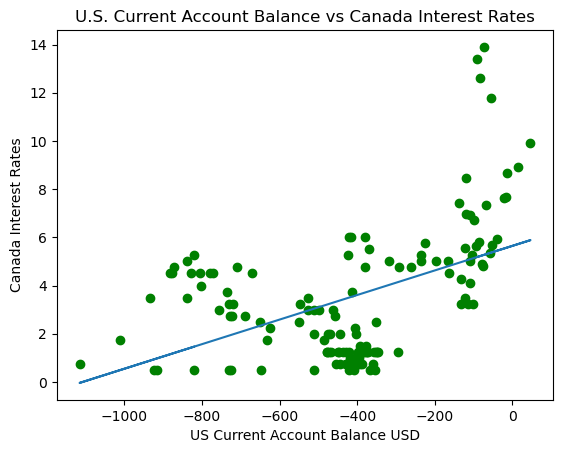

In [118]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['CD_R'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = 0.0051
b = 5.6455


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['CD_R'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('Canada Interest Rates')
plt.title('U.S. Current Account Balance vs Canada Interest Rates')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.326
Date:                Mon, 19 Feb 2024   Prob (F-statistic):              0.130
Time:                        22:15:06   Log-Likelihood:                -261.45
No. Observations:                 135   AIC:                             526.9
Df Residuals:                     133   BIC:                             532.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0381      0.320     -6.361      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs UK Current Account Balance')

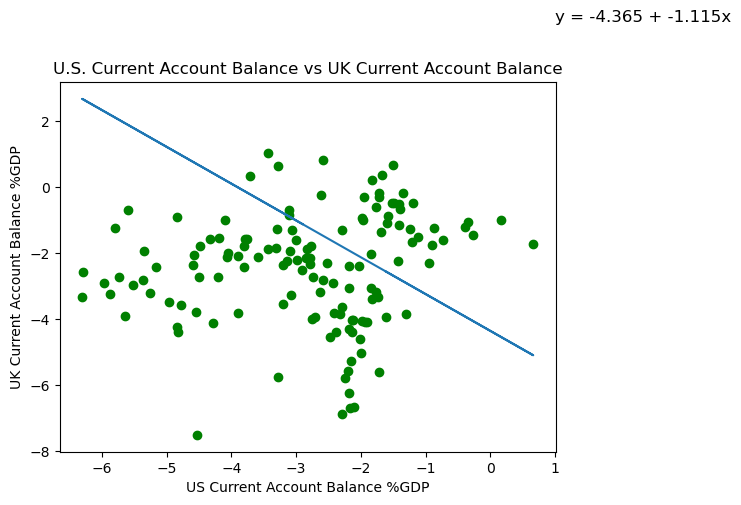

In [119]:
# defining the variables
x = DF['US_CA_%GDP'].tolist()
y = DF['UK_CA_%GDP'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = -1.1149
b = -4.3655


#add points to plot
plt.scatter(DF['US_CA_%GDP'], DF['UK_CA_%GDP'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_%GDP'], a*DF['US_CA_%GDP']+b)

#add fitted regression equation to plot
plt.text(1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('US Current Account Balance %GDP')
plt.ylabel('UK Current Account Balance %GDP')
plt.title('U.S. Current Account Balance vs UK Current Account Balance')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     30.85
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.46e-07
Time:                        23:46:43   Log-Likelihood:                -528.20
No. Observations:                 135   AIC:                             1060.
Df Residuals:                     133   BIC:                             1066.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9059      2.002     -2.951      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs UK Current Account Balance')

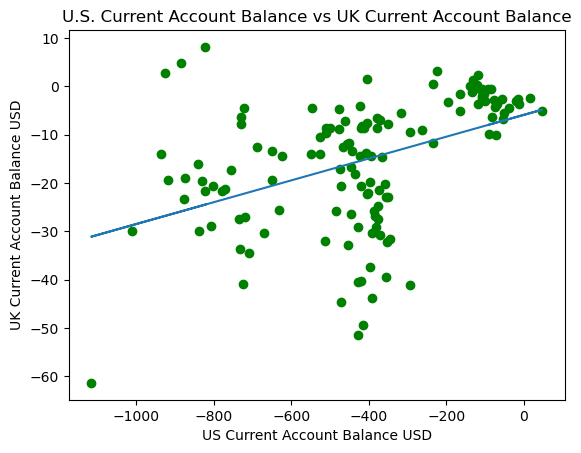

In [155]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['UK_CA_USD'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = 0.0226
b = -5.9059


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['UK_CA_USD'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)

#add fitted regression equation to plot

#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('UK Current Account Balance USD')
plt.title('U.S. Current Account Balance vs UK Current Account Balance')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     227.9
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.28e-30
Time:                        22:17:28   Log-Likelihood:                -1007.7
No. Observations:                 135   AIC:                             2019.
Df Residuals:                     133   BIC:                             2025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1364.1856     69.803     19.543      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs UK GDP')

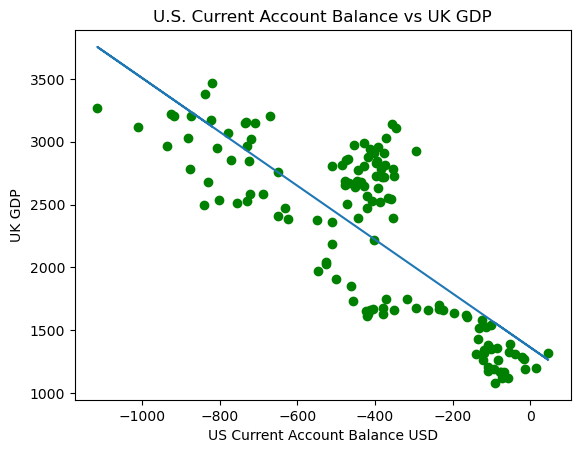

In [123]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['UK_GDP_USD'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = -2.1436
b =  1364.1856


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['UK_GDP_USD'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)

#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('UK GDP')
plt.title('U.S. Current Account Balance vs UK GDP')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           6.58e-22
Time:                        22:19:51   Log-Likelihood:                -228.64
No. Observations:                 135   AIC:                             461.3
Df Residuals:                     133   BIC:                             467.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5277      0.218     39.186      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs UK Unemployment Rate')

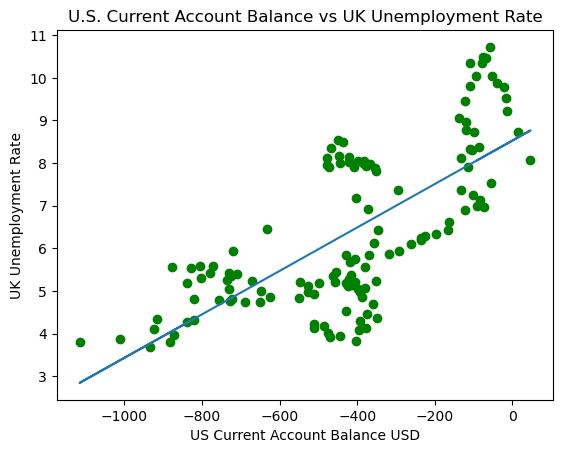

In [125]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['UK_U'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = 0.0051
b = 8.5277


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['UK_U'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('UK Unemployment Rate')
plt.title('U.S. Current Account Balance vs UK Unemployment Rate')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     38.78
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           6.06e-09
Time:                        22:29:42   Log-Likelihood:                -1088.5
No. Observations:                 132   AIC:                             2181.
Df Residuals:                     130   BIC:                             2187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        556.1061    154.004      3.611      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs UK Public Debt')

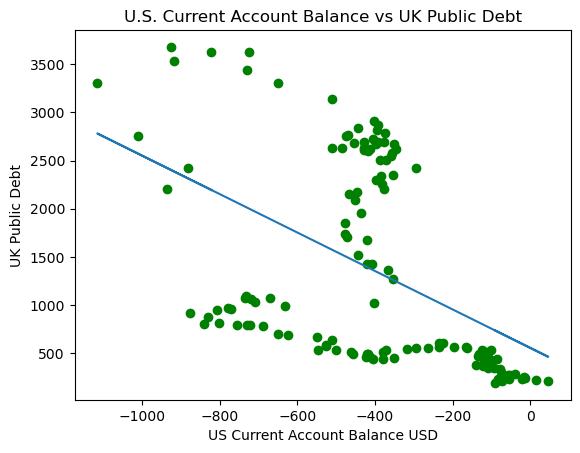

In [130]:
# defining the variables
x = DF['US_CA_USD'].tolist()[:132]
y = DF['UK_PD'].tolist()[:132] # Public Debt variable is missing the last 3 values


# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = -1.9957
b = 556.1061


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['UK_PD'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('UK Public Debt')
plt.title('U.S. Current Account Balance vs UK Public Debt')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     156.1
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           3.49e-24
Time:                        23:01:40   Log-Likelihood:                -1053.2
No. Observations:                 135   AIC:                             2110.
Df Residuals:                     133   BIC:                             2116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        377.1750     97.792      3.857      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs UK Money Supply')

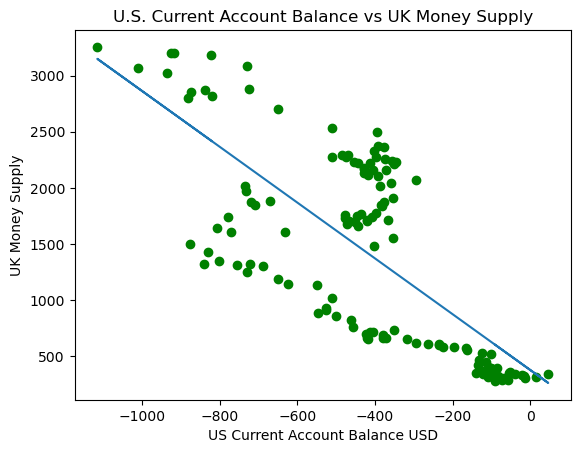

In [132]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['UK_MS'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = -2.4858
b = 377.1750


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['UK_MS'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('UK Money Supply')
plt.title('U.S. Current Account Balance vs UK Money Supply')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.437
Date:                Mon, 19 Feb 2024   Prob (F-statistic):              0.233
Time:                        23:05:05   Log-Likelihood:                 26.725
No. Observations:                 135   AIC:                            -49.45
Df Residuals:                     133   BIC:                            -43.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6027      0.033     48.826      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs USD/GBP Exchange rate')

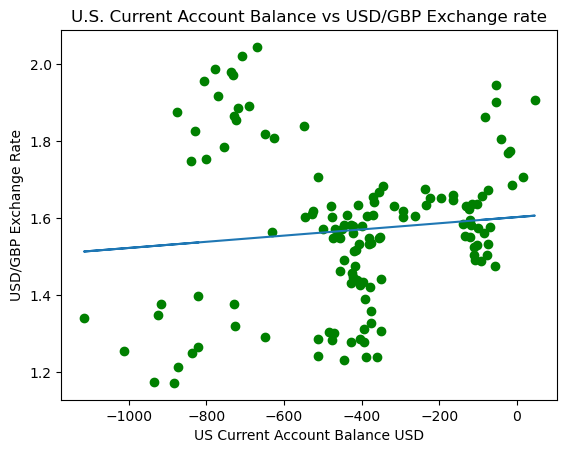

In [134]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['USD_UK'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = 8.006e-05
b = 1.6027


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['USD_UK'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('USD/GBP Exchange Rate')
plt.title('U.S. Current Account Balance vs USD/GBP Exchange rate')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     40.20
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           3.30e-09
Time:                        23:06:11   Log-Likelihood:                -343.98
No. Observations:                 135   AIC:                             692.0
Df Residuals:                     133   BIC:                             697.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6154      0.511     12.935      0.0

Text(0.5, 1.0, 'U.S. Current Account Balance vs UK Interest Rates')

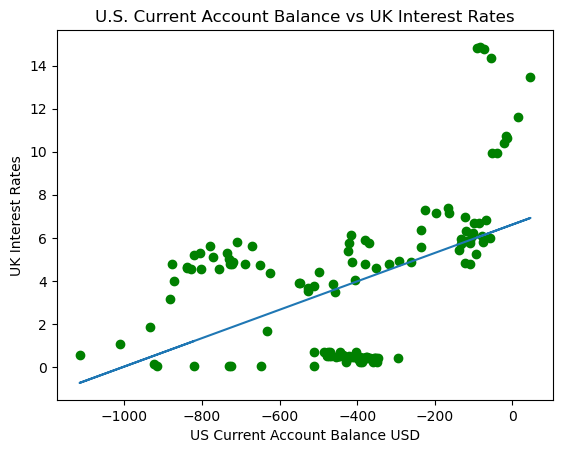

In [136]:
# defining the variables
x = DF['US_CA_USD'].tolist()
y = DF['UK_R'].tolist()
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

#find line of best fit

a = 0.0066
b = 6.6154


#add points to plot
plt.scatter(DF['US_CA_USD'], DF['UK_R'], color='green')

#add line of best fit to plot
plt.plot(DF['US_CA_USD'], a*DF['US_CA_USD']+b)


#add axis labels
plt.xlabel('US Current Account Balance USD')
plt.ylabel('UK Interest Rates')
plt.title('U.S. Current Account Balance vs UK Interest Rates')

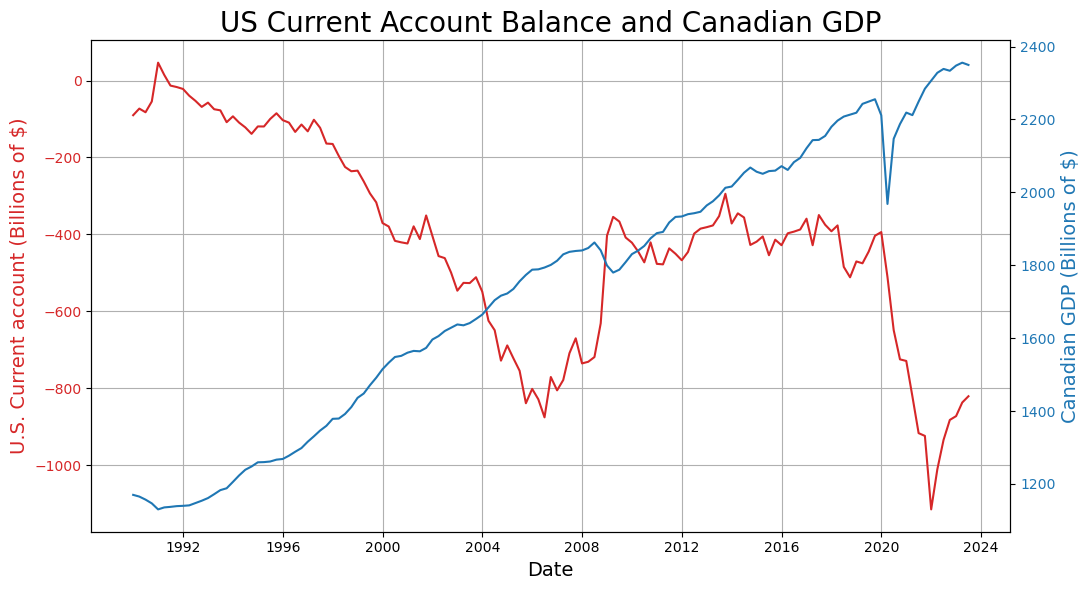

In [169]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,6))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('U.S. Current account (Billions of $)', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['US_CA_USD'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Canadian GDP (Billions of $)', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['CD_GDP_USD']/1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance and Canadian GDP", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

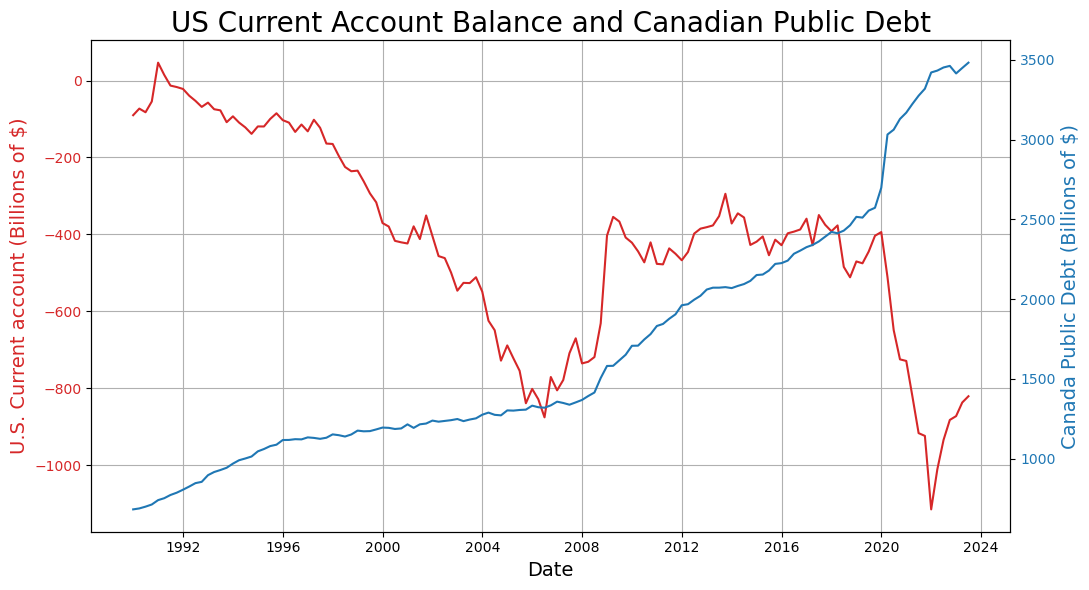

In [164]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,6))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('U.S. Current account (Billions of $)', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['US_CA_USD'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Canada Public Debt (Billions of $)', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['CD_PD'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance and Canadian Public Debt", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

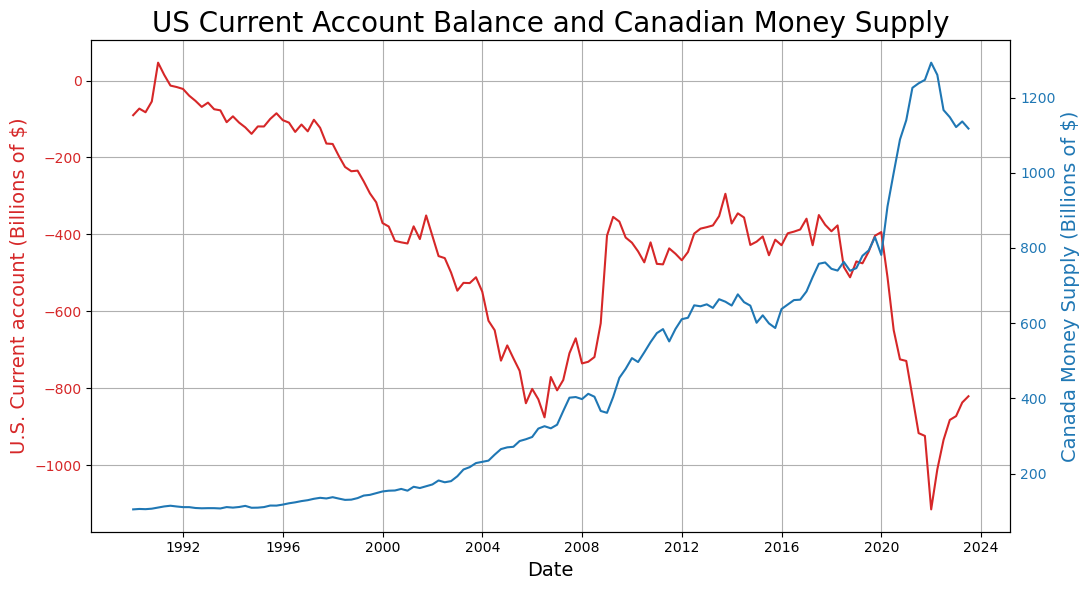

In [165]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,6))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('U.S. Current account (Billions of $)', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['US_CA_USD'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Canada Money Supply (Billions of $)', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['CD_MS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance and Canadian Money Supply", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

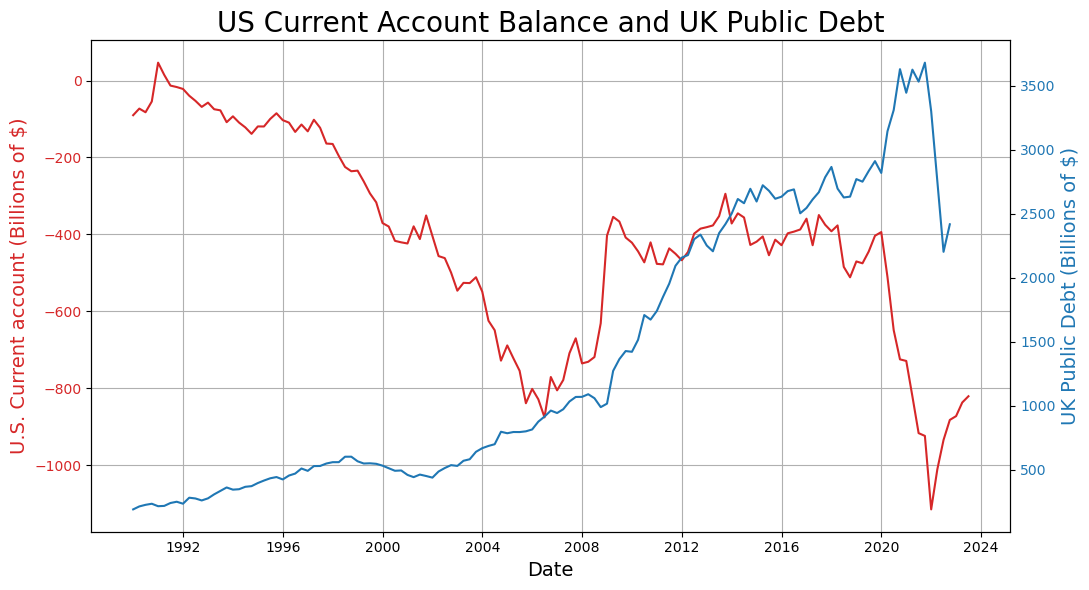

In [166]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,6))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('U.S. Current account (Billions of $)', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['US_CA_USD'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('UK Public Debt (Billions of $)', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['UK_PD'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance and UK Public Debt", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

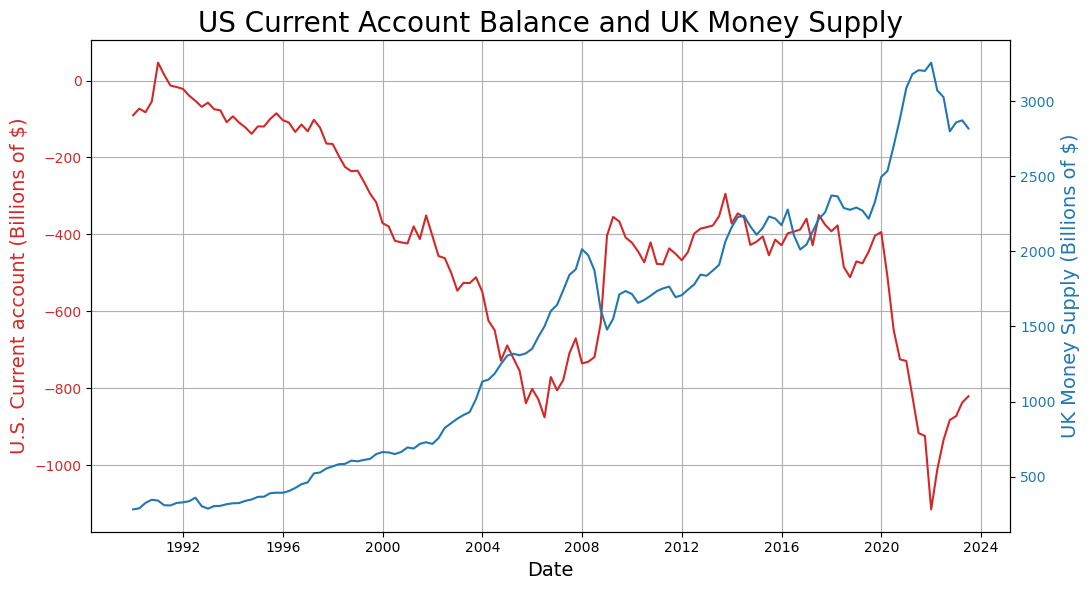

In [168]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,6))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('U.S. Current account (Billions of $)', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['US_CA_USD'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('UK Money Supply (Billions of $)', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['UK_MS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance and UK Money Supply", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

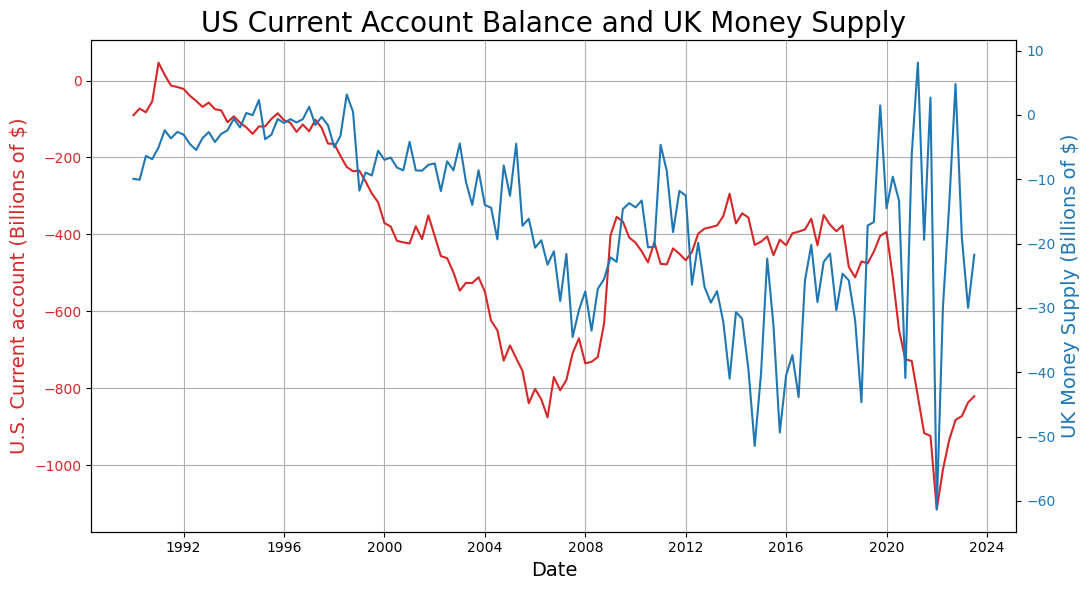

In [170]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,6))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('U.S. Current account (Billions of $)', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['US_CA_USD'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('UK Money Supply (Billions of $)', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['UK_CA_USD'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance and UK Money Supply", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

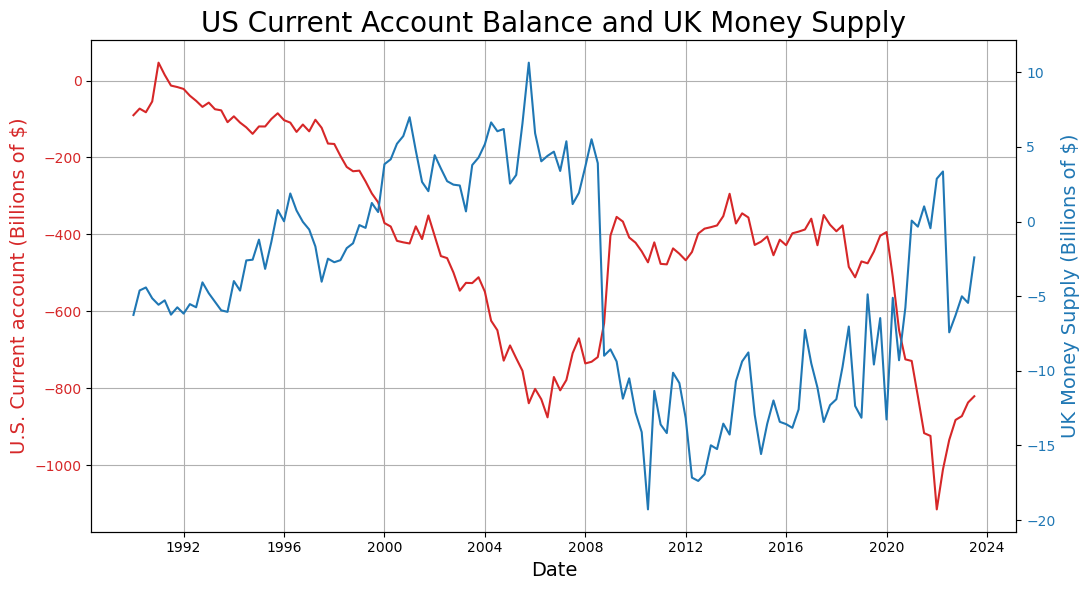

In [171]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,6))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('U.S. Current account (Billions of $)', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['US_CA_USD'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('UK Money Supply (Billions of $)', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['CD_CA_USD'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance and UK Money Supply", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

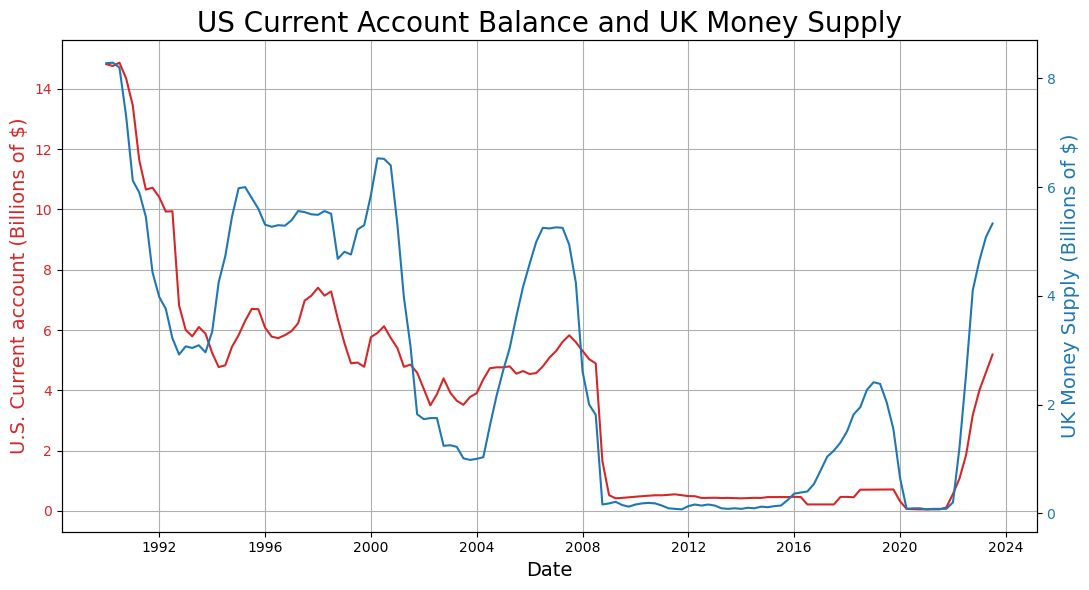

In [173]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,6))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('U.S. Current account (Billions of $)', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['UK_R'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('UK Money Supply (Billions of $)', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['US_R'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance and UK Money Supply", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

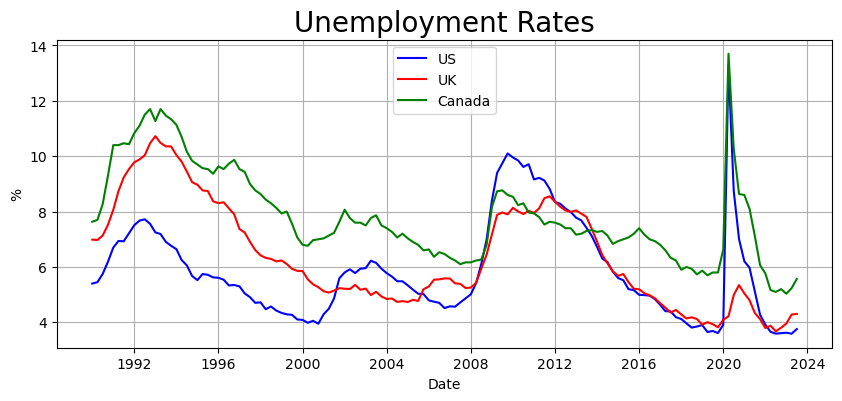

In [185]:
plt.figure(figsize=(10,4))
plt.plot(DF['PERIOD'], DF['US_U'], label='US', color='blue')
plt.plot(DF['PERIOD'], DF['UK_U'], label='UK', color='red')
plt.plot(DF['PERIOD'], DF['CD_U'], label='Canada', color='green')
plt.ylabel('%')
plt.xlabel('Date')
plt.grid(True)
plt.title('Unemployment Rates', fontsize=20)
plt.legend()
plt.show()

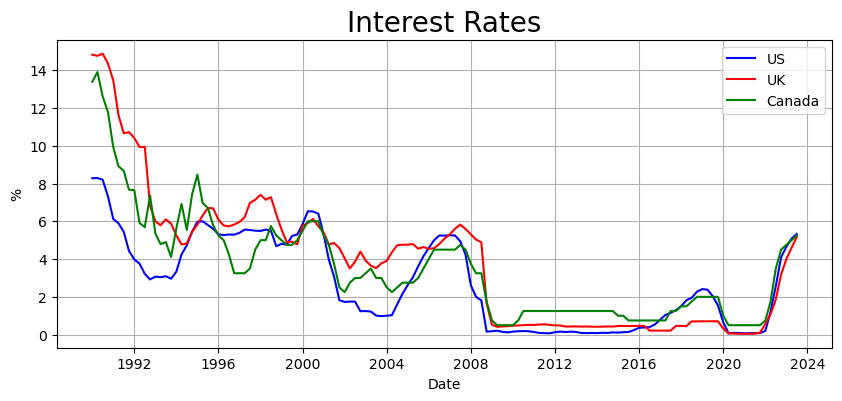

In [177]:
plt.figure(figsize=(10,4))
plt.plot(DF['PERIOD'], DF['US_R'], label='US', color='blue')
plt.plot(DF['PERIOD'], DF['UK_R'], label='UK', color='red')
plt.plot(DF['PERIOD'], DF['CD_R'], label='Canada', color='green')
plt.ylabel('%')
plt.xlabel('Date')
plt.grid(True)
plt.title('Interest Rates', fontsize=20)
plt.legend()
plt.show()

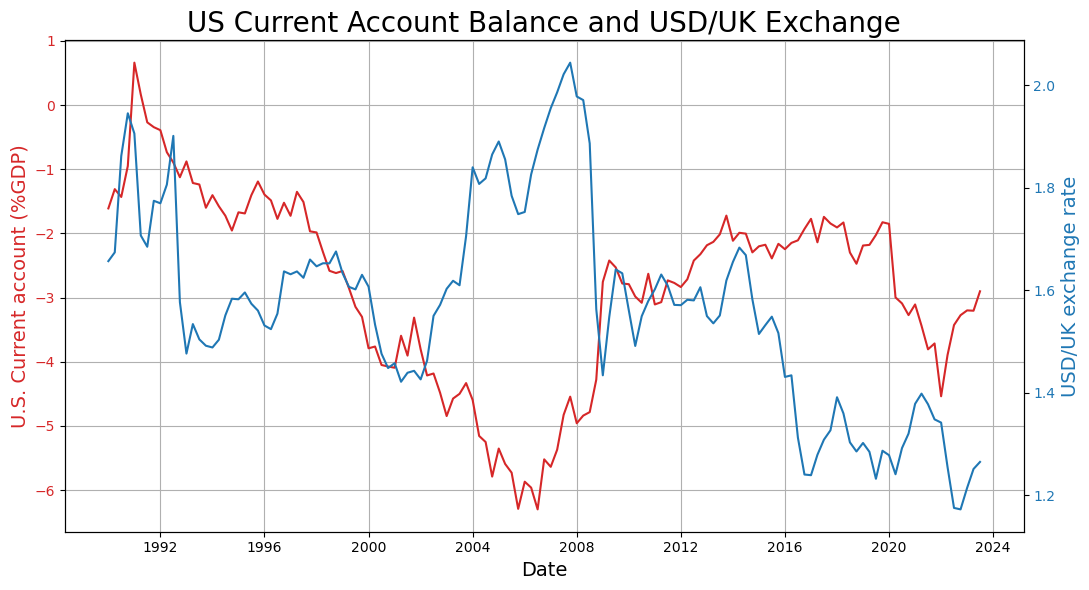

In [183]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,6))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('U.S. Current account (%GDP)', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['US_CA_%GDP'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('USD/UK exchange rate', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['USD_UK'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance and USD/UK Exchange", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

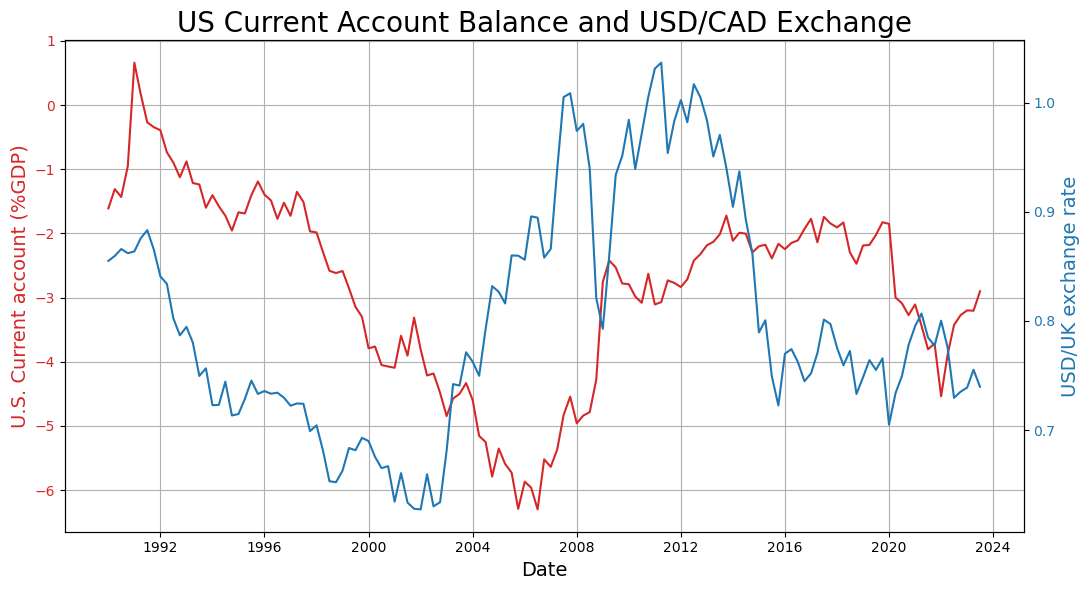

In [182]:
# Create a Plot to display the US current account balance


fig, ax1 = plt.subplots(figsize=(11,6))
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('U.S. Current account (%GDP)', color=color, fontsize=14)
ax1.plot(DF['PERIOD'], DF['US_CA_%GDP'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('USD/UK exchange rate', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(DF['PERIOD'], DF['USD_CAD'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True)
plt.title("US Current Account Balance and USD/CAD Exchange", fontsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()